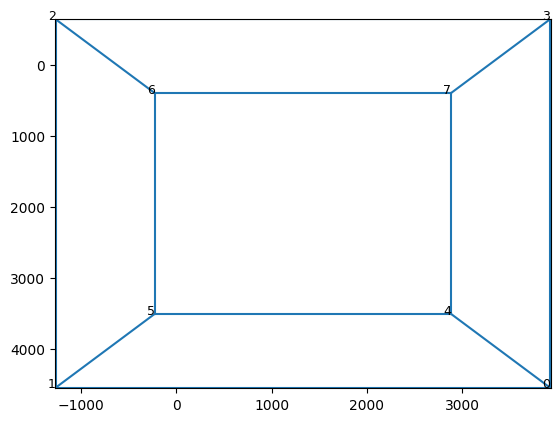

In [33]:
#number 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#importing extrinsic Matrices T and K

# cTw = np.array([
#     [0.707, 0.707, 0, -3],
#     [-0.707, 0.707, 0, -0.5],
#     [0, 0, 1, 3]
# ])
cTw = np.array([
    [1, 0, 0, -1],
    [0, 1, 0, -1],
    [0, 0, 1, -3]
])
K = np.array([
    [7.45431842e+03, 0, 1.34046295e+03],
    [0, 6.55319939e+03, 2.05743206e+03],
    [0, 0, 1]
])


def main():

    #Vertices of the Object (rectangle)
    vertices = np.array([
        [0,0,0],  #0
        [2,0,0],   #1
        [2,2,0],    #2
        [0,2,0],   #3
        [0,0,-2],   #4
        [2,0,-2],    #5
        [2,2,-2],     #6
        [0,2,-2],     #7
    ])
    ones = np.ones((vertices.shape[0], 1))
    vertices = np.hstack((vertices, ones))

    #find the camera matrix using extrinsic matrices
    camera_matrix = np.dot(K,cTw)

    #put vertices into imaging pipeline
    points2d = []
    for i in vertices:
        point = np.dot(camera_matrix, i) #point in homogeneous coordinates
        point = point / point[2] #divide by 3rd element
        points2d.append(point[:2]) #only take the first two elements for the 2d point

    points2d = np.array(points2d)
    #plotting and creating the figure
    fig, ax = plt.subplots()
    
    Edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # front
    (4, 5), (5, 6), (6, 7), (7, 4),  # back
    (0, 4), (1, 5), (2, 6), (3, 7),   # #sides
    ]

    for edge in Edges:
        line = Line2D(
            [points2d[edge[0]][0], points2d[edge[1]][0]],
            [points2d[edge[0]][1], points2d[edge[1]][1]]
        )
        ax.add_line(line)
    for i, point in enumerate(points2d):
        ax.text(point[0], point[1], str(i), fontsize=9, ha='right')
    #must invert the y axis to match convention

    ax.set_xlim(min(points2d[:, 0]) - 10, max(points2d[:, 0]) + 10)
    ax.set_ylim(min(points2d[:, 1]) - 10, max(points2d[:, 1]) + 10)
    ax.invert_yaxis()
    plt.show()


    
if __name__ == "__main__": 
    main()


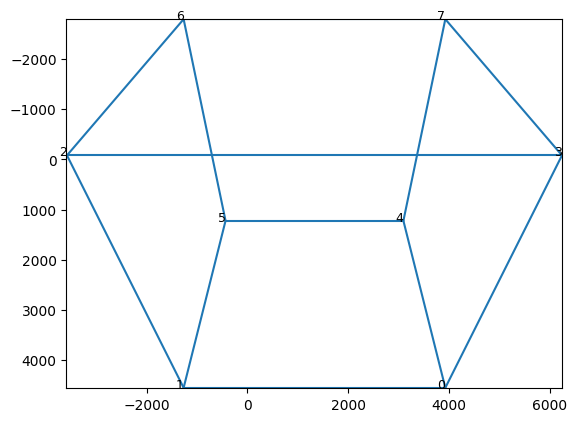

In [44]:
#number 3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#importing extrinsic Matrices T and K
#45 degrees rotation about X axis
cTw = np.array([
    [1, 0, 0, -1],
    [0, 0.707, -0.707, -1],
    [0, 0.707, 0.707, -3]
])

K = np.array([
    [7.45431842e+03, 0, 1.34046295e+03],
    [0, 6.55319939e+03, 2.05743206e+03],
    [0, 0, 1]
])


#Vertices of the Object (rectangle)
vertices = np.array([
    [0,0,0],  #0
    [2,0,0],   #1
    [2,2,0],    #2
    [0,2,0],   #3
    [0,0,-2],   #4
    [2,0,-2],    #5
    [2,2,-2],     #6
    [0,2,-2],     #7
])
ones = np.ones((vertices.shape[0], 1))
vertices = np.hstack((vertices, ones))

#find the camera matrix using extrinsic matrices
camera_matrix = np.dot(K,cTw)

#put vertices into imaging pipeline
points2d = []
for i in vertices:
    point = np.dot(camera_matrix, i) #point in homogeneous coordinates
    point = point / point[2] #divide by 3rd element
    points2d.append(point[:2]) #only take the first two elements for the 2d point

points2d = np.array(points2d)
#plotting and creating the figure
fig, ax = plt.subplots()

Edges = [
(0, 1), (1, 2), (2, 3), (3, 0),  # front
(4, 5), (5, 6), (6, 7), (7, 4),  # back
(0, 4), (1, 5), (2, 6), (3, 7),   # #sides
]

for edge in Edges:
    line = Line2D(
        [points2d[edge[0]][0], points2d[edge[1]][0]],
        [points2d[edge[0]][1], points2d[edge[1]][1]]
    )
    ax.add_line(line)
for i, point in enumerate(points2d):
    ax.text(point[0], point[1], str(i), fontsize=9, ha='right')
#must invert the y axis to match convention

ax.set_xlim(min(points2d[:, 0]) - 10, max(points2d[:, 0]) + 10)
ax.set_ylim(min(points2d[:, 1]) - 10, max(points2d[:, 1]) + 10)
ax.invert_yaxis()
plt.show()




In [89]:
#number 4 - using PnP to find prose and error
import cv2
import numpy as np
#Vertices of the Object (rectangle) 3d points
vertices = np.array([
        [0,0,0],  #0
        [2,0,0],   #1
        [2,2,0],    #2
        [0,2,0],   #3
        [0,0,-2],   #4
        [2,0,-2],    #5
        [2,2,-2],     #6
        [0,2,-2],     #7
    ],dtype=np.float64)

#k taken from q1
K = np.array([
    [7.45431842e+03, 0, 1.34046295e+03],
    [0, 6.55319939e+03, 2.05743206e+03],
    [0, 0, 1]
],dtype=np.float64)

#distortion coefficients taken from q1
dist =  np.array([-1.67466357e+00 ,5.28658662e+01 ,-3.79551828e-03, -6.74416089e-04, -5.18485836e+02])
img_points = np.array(points2d, dtype=np.float64)
 # Find the rotation and translation vectors.
ret,rvecs, tvecs = cv2.solvePnP(vertices, img_points, K , dist)

if(ret):
    rotation_matrix,_ = cv2.Rodrigues(rvecs)
    print('rotation matrix',rotation_matrix)
    print('translation vector',tvecs)

    #error calculation

    #image pipeline


    transformation_matrix = np.hstack((rotation_matrix, tvecs))
    cameraMat = np.dot(K, transformation_matrix)

    #reformat vertices 
    ones = np.ones((vertices.shape[0], 1))
    vertices = np.hstack((vertices, ones))
    reimgPoints = []
    for i in vertices:
        cameraVertices = np.dot(cameraMat, i)
        cameraVertices = cameraVertices / cameraVertices[2] #divide by 3rd element
        reimgPoints.append(cameraVertices[:2]) #only take the first two elements for the 2d point
    reimgPoints = np.array(reimgPoints)

    error = np.linalg.norm(img_points - reimgPoints, axis=1)
    error = np.mean(error)
    print('\nError: ',error)
else:
    print('no solution found')



rotation matrix [[ 0.99748427  0.06922504  0.01526519]
 [-0.05496135  0.89123182 -0.45020561]
 [-0.04477033  0.44823401  0.89279443]]
translation vector [[-1.063558  ]
 [-1.06957476]
 [-4.97451637]]

Error:  2158.8841458302804
